***
# Connect surveys with (target) coordinates


Surveys provide methods to associate `fieldid` with input coordinates. 

## Get a mock `Survey`

In [1]:
from skysurvey import example

In [2]:
mocksurvey = example.get_mocksurvey()

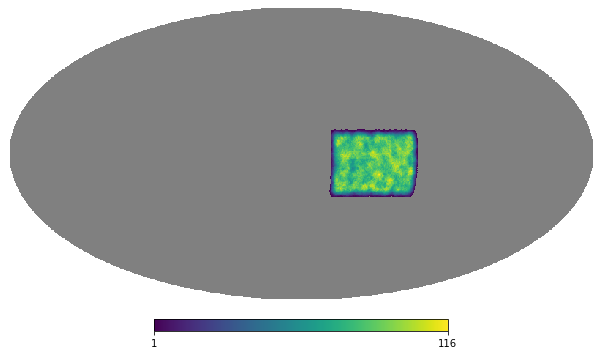

In [3]:
mocksurvey.show()

## Simulate random SNeIa in the sky

Let's simulate 200_000 targets all across the sky

In [4]:
from skysurvey import tools
radec = tools.random_radec(200_000)

***
## `.radec_to_fieldid()`

`(grid)survey.radec_to_fieldid()` enables to quickly associate given coordinates (RA,Dec ; in degree) to given fields. 

### Associate them with the survey field system

Have a `radec_to_fieldid()` method that will 

In [5]:
%%time
df = mocksurvey.radec_to_fieldid(radec)
df.head()

CPU times: user 15.4 ms, sys: 5.5 ms, total: 20.9 ms
Wall time: 26.7 ms


,fieldid
index_radec,
0,471923
1,473583
2,172259
3,474224
4,8597


- `index_radec` is the indice of the input radec target
- `fieldid` is the field index

It takes ~20ms to match 200_000 coordinates over 480 000 fields... (healpix)

and see how it looks

In [6]:
ntarget_per_fieldid = df.groupby("fieldid").size()

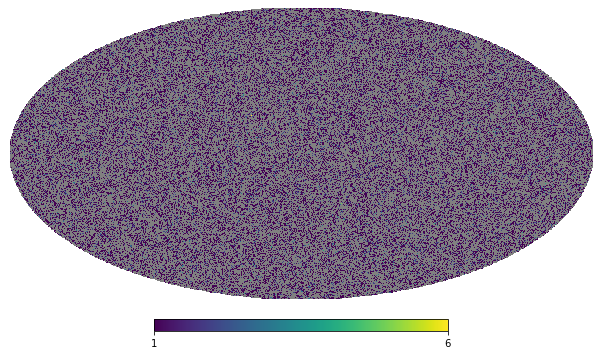

In [7]:
mocksurvey.show(data=ntarget_per_fieldid)

Here the full sky is covered as we did not specify we only want the field actually observed.

### Limit this to actually observed fields

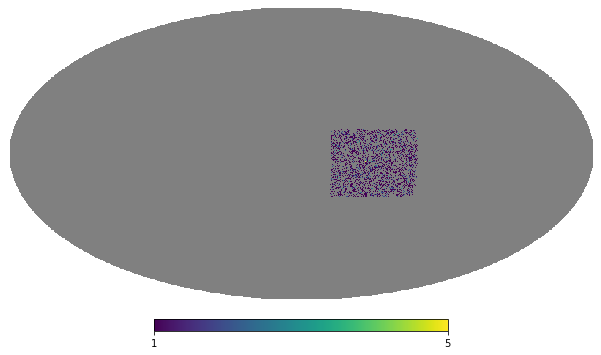

In [8]:
df = mocksurvey.radec_to_fieldid(radec, observed_fields=True)
ntarget_per_fieldid = df.groupby("fieldid").size()
mocksurvey.show(data=ntarget_per_fieldid)

***
## `.get_observations_from_coords()`

If you want to know the observation history of a specific coordinate, simply use the `.get_observations_from_coords()` method

In [9]:
mocksurvey.get_observations_from_coords([210, 0])

,ra,dec,gain,zp,skynoise,mjd,band,fieldid_survey,fieldid
494109,209.444733,1.155480,1,30,184.322281,58923.765625,desg,874,240333
494110,210.912842,-0.473495,1,30,184.363663,58925.347656,desg,7601,240333
494111,208.598297,0.043441,1,30,207.956436,58911.136719,desi,9698,240333
494112,208.108414,-0.253666,1,30,228.037170,58926.125000,desi,1899,240333
494113,211.529388,-1.009904,1,30,214.324203,58913.121094,desg,8665,240333
...,...,...,...,...,...,...,...,...,...
494205,211.227097,0.527715,1,30,189.745224,58904.859375,desg,1499,240333
494206,209.429901,0.158741,1,30,198.601501,58920.218750,desr,5578,240333
494207,208.243423,-0.214293,1,30,231.300903,58920.800781,desr,6981,240333
494208,210.473022,-1.548322,1,30,197.024139,58916.355469,desg,8840,240333
